# **Pre-Processing**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os
import random
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip '/content/drive/MyDrive/DL_Project/Copy of training_set.zip' -d '/content/drive/MyDrive/DL Project'
!unzip '/content/drive/MyDrive/DL Project/Copy of testing_set.zip'  -d '/content/drive/MyDrive/DL Project'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_1578.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_920.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_483.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_43.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_359.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_883.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_410.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_1214.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_1363.jpg  
  inflating: /content/drive/MyDrive/DL Project/content/testing_set/Skiing/frame_1358.jpg  
  inflating: /content/drive/MyDrive/DL Project

In [ ]:
# importing libraries
import os
import glob
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger, EarlyStopping
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Required Parameters
train_path = "/content/drive/MyDrive/DL Project/content/training_set"
test_path = "/content/drive/MyDrive/DL Project/content/testing_set"
no_of_frames = 1150
epochs = 5
batch_size = 128 
n_classes = 50
patience = 2 
stime = int(time.time())
categories = os.listdir(train_path)

In [ ]:
categories.sort()
print(categories)

['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards', 'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing', 'GolfSwing', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Lunges', 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing', 'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet', 'SoccerJuggling', 'Swing', 'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input  
base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
preds = Dense(n_classes, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = base_model.input, outputs = preds)

In [ ]:
# Printing the names of each layer
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

In [ ]:
# Model Summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# Setting each layer as trainable
for layer in model.layers:
    layer.trainable = True

In [ ]:
# Defining Image Data Generators
train_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split = 0.4)
test_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagenerator.flow_from_directory(train_path,
                                                          target_size = (224, 224),
                                                          color_mode = 'rgb',
                                                          batch_size = batch_size,
                                                          class_mode = 'categorical',
                                                          subset = 'training',
                                                          shuffle = True)

validation_generator = train_datagenerator.flow_from_directory(train_path,
                                                               target_size = (224, 224),
                                                               color_mode = 'rgb',
                                                               batch_size = batch_size,
                                                               class_mode = 'categorical',
                                                               subset = 'validation')

test_generator = test_datagenerator.flow_from_directory(test_path,
                                                        target_size = (224, 224),
                                                        color_mode = 'rgb',
                                                        class_mode = 'categorical')

Found 31713 images belonging to 50 classes.
Found 21141 images belonging to 50 classes.
Found 0 images belonging to 0 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

{'BaseballPitch': 0, 'Basketball': 1, 'BenchPress': 2, 'Biking': 3, 'Billiards': 4, 'BreastStroke': 5, 'CleanAndJerk': 6, 'Diving': 7, 'Drumming': 8, 'Fencing': 9, 'GolfSwing': 10, 'HighJump': 11, 'HorseRace': 12, 'HorseRiding': 13, 'HulaHoop': 14, 'JavelinThrow': 15, 'JugglingBalls': 16, 'JumpRope': 17, 'JumpingJack': 18, 'Kayaking': 19, 'Lunges': 20, 'MilitaryParade': 21, 'Mixing': 22, 'Nunchucks': 23, 'PizzaTossing': 24, 'PlayingGuitar': 25, 'PlayingPiano': 26, 'PlayingTabla': 27, 'PlayingViolin': 28, 'PoleVault': 29, 'PommelHorse': 30, 'PullUps': 31, 'Punch': 32, 'PushUps': 33, 'RockClimbingIndoor': 34, 'RopeClimbing': 35, 'Rowing': 36, 'SalsaSpin': 37, 'SkateBoarding': 38, 'Skiing': 39, 'Skijet': 40, 'SoccerJuggling': 41, 'Swing': 42, 'TaiChi': 43, 'TennisSwing': 44, 'ThrowDiscus': 45, 'TrampolineJumping': 46, 'VolleyballSpiking': 47, 'WalkingWithDog': 48, 'YoYo': 49}
{'BaseballPitch': 0, 'Basketball': 1, 'BenchPress': 2, 'Biking': 3, 'Billiards': 4, 'BreastStroke': 5, 'CleanAndJe

In [ ]:
import tensorflow as tf

#**Model training**

In [ ]:
# Define the F-1 Score as Evaluation Metric
# Reference - 
def get_f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras import backend as K

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        get_f1_score
]

In [ ]:
# Compiling the Model
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

In [ ]:
tf.config.run_functions_eagerly(False)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


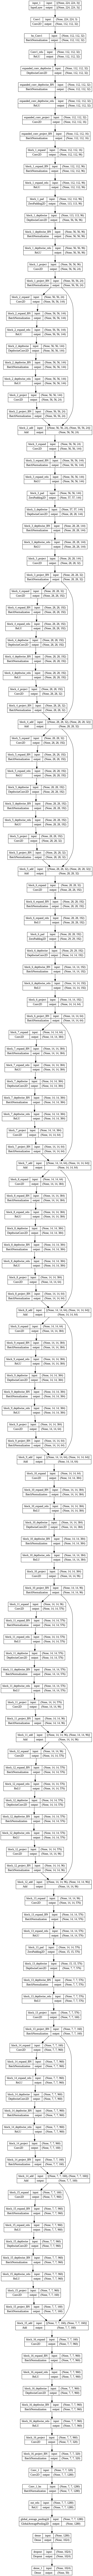

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Creating a timestamp directory
try:
    os.mkdir("{}_{}b_{}e".format(stime, batch_size, epochs))
except:
    print("Directory already present...")

Directory already present...


In [ ]:
# CSVLogger
filename = "{}_{}b_{}\\file.csv".format(stime, batch_size, epochs)
csv_log = CSVLogger(filename)

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(patience = patience)

In [ ]:
# Training the Model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    callbacks = [csv_log, early_stopping])

Epoch 1/5
258/258 [==============================] - 285s 1s/step - loss: 0.0549 - accuracy: 0.9996 - precision: 0.9946 - recall: 0.9836 - auc: 0.9999 - get_f1_score: 0.9891 - val_loss: 0.2811 - val_accuracy: 0.9971 - val_precision: 0.9566 - val_recall: 0.8954 - val_auc: 0.9969 - val_get_f1_score: 0.9249
Epoch 2/5
258/258 [==============================] - 265s 1s/step - loss: 0.0405 - accuracy: 0.9997 - precision: 0.9961 - recall: 0.9895 - auc: 1.0000 - get_f1_score: 0.9928 - val_loss: 0.2337 - val_accuracy: 0.9976 - val_precision: 0.9627 - val_recall: 0.9155 - val_auc: 0.9971 - val_get_f1_score: 0.9384
Epoch 3/5
258/258 [==============================] - 265s 1s/step - loss: 0.0307 - accuracy: 0.9998 - precision: 0.9977 - recall: 0.9928 - auc: 1.0000 - get_f1_score: 0.9953 - val_loss: 0.2136 - val_accuracy: 0.9978 - val_precision: 0.9624 - val_recall: 0.9240 - val_auc: 0.9972 - val_get_f1_score: 0.9428
Epoch 4/5
258/258 [==============================] - 265s 1s/step - loss: 0.0239 -

In [ ]:
model.save('/content/drive/MyDrive/DL_Project/content/modelMobileNetV2.h5') 

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1,model_name):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Training', 'Validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['Training', 'Validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['Training', 'Validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['Training', 'Validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['Training', 'Validation'])
    plt.show()
    plt.savefig('/content/drive/MyDrive/DL_Project/content/{}.png'.format(model_name), bbox_inches='tight')

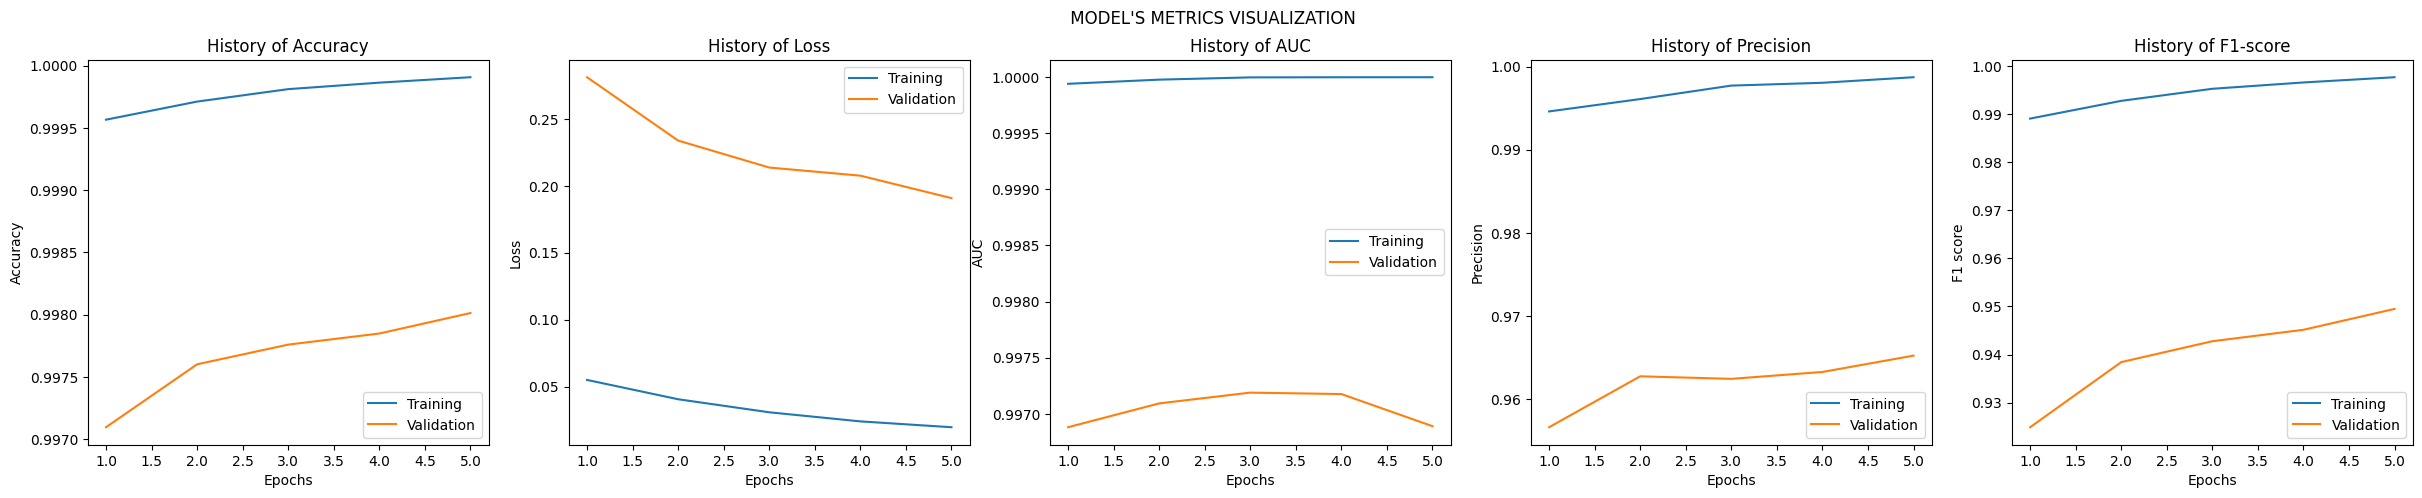

<Figure size 640x480 with 0 Axes>

In [ ]:
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
              history.history['precision'],history.history['val_precision'],
               history.history['get_f1_score'],history.history['val_get_f1_score'],'ResNet'
              )

In [ ]:
# Evaluating Model's Performance
history2 = model.evaluate(test_generator)

235/235 [==============================] - 37s 154ms/step - loss: 0.0945 - accuracy: 0.9990 - precision: 0.9824 - recall: 0.9679 - auc: 0.9988 - get_f1_score: 0.9750


# **Testing Loaded Model**

In [ ]:
MobileNetV2_load = tf.keras.models.load_model('/content/drive/MyDrive/DL_Project/content/modelMobileNetV2.h5', custom_objects={"get_f1_score": get_f1_score })

In [ ]:
# Defining Image Data Generators
test_datagenerator = ImageDataGenerator(preprocessing_function = preprocess_input)
test_generator = test_datagenerator.flow_from_directory('/content/drive/MyDrive/DL_Project/content/testing_set',
                                                        target_size = (224, 224),
                                                        color_mode = 'rgb',
                                                        class_mode = 'categorical',
                                                        shuffle=False,
                                                        batch_size=1
                                                      )

Found 7500 images belonging to 50 classes.


In [ ]:
activity_list = test_generator.class_indices

In [ ]:
def get_activity(val, activities):
    for key, value in activities.items():
        if val == value:
            return key

    return "Invalid"

In [ ]:
filenames = test_generator.filenames
samples = len(filenames)
predictions = MobileNetV2_load.predict(test_generator, steps = samples, verbose = 1)

y_pred = []
for val in predictions:
    y_pred.append(get_activity(np.argmax(val), activity_list))

y_true = []
for file in filenames:
    y_true.append(file.split("\\")[0].split('/')[0])

print(classification_report(y_pred, y_true))

7500/7500 [==============================] - 73s 10ms/step
                    precision    recall  f1-score   support

     BaseballPitch       0.99      0.97      0.98       153
        Basketball       0.97      0.97      0.97       150
        BenchPress       1.00      0.99      0.99       152
            Biking       0.99      0.98      0.98       151
         Billiards       1.00      1.00      1.00       150
      BreastStroke       1.00      0.98      0.99       153
      CleanAndJerk       0.99      1.00      1.00       149
            Diving       0.98      0.99      0.98       149
          Drumming       0.99      1.00      1.00       149
           Fencing       0.99      0.98      0.98       151
         GolfSwing       0.99      0.93      0.96       160
          HighJump       0.94      0.84      0.89       168
         HorseRace       0.98      0.99      0.99       148
       HorseRiding       0.97      0.99      0.98       148
          HulaHoop       0.98      0.99 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

In [ ]:
from keras.preprocessing import image

In [ ]:
# load_model_sample.py
from keras.models import load_model
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
# image path
img_path = '/content/drive/MyDrive/DL Project/content/testing_set/JumpRope/frame_1108.jpg'   
new_image = image.load_img(img_path)

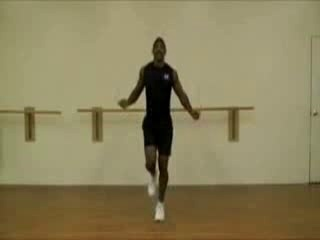

In [ ]:
display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 1s 1s/step
Predicted: [('n03535780', 'horizontal_bar', 8.354957)]


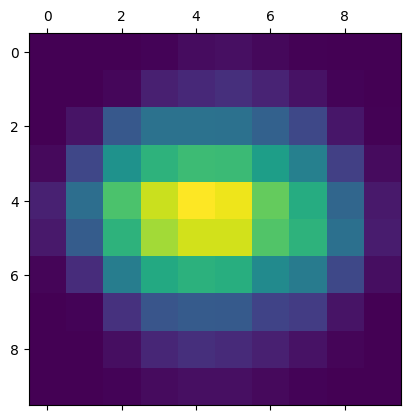

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-66-34e0b9574523>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


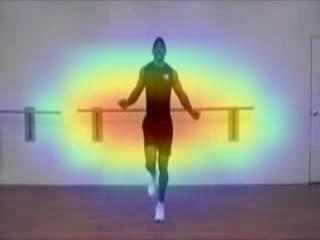

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)